# Exploratory Data Analysis on the US Visa Data 

### US Visa Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## About the Project

The **United States visa application process** involves multiple steps and evaluations to determine whether an applicant qualifies for a work visa, such as H1B, H2B, or other types of employment-based visas. Over the years, there has been a **significant rise in applications** due to global job markets, especially in tech, healthcare, and engineering industries.

However, the approval rate depends on complex criteria such as:
- Applicant demographics
- Education and experience
- Job roles and employer profile
- Prevailing wage levels
- Visa categories and subcategories

This project leverages **data analysis**, **feature engineering**, and **machine learning** to **predict the likelihood of visa approval** for new applicants.

Such predictive insights can:
- Help applicants understand their approval chances.
- Assist employers and attorneys in reviewing applications before submission.
- Support policy researchers analyzing patterns in immigration data.

### 1) Problem Statement

The **Office of Foreign Labor Certification (OFLC)** processes job certification applications for employers seeking to hire foreign workers in the United States. With the significant growth in the number of applications in recent years, the OFLC faces challenges in efficiently screening and evaluating visa applications.

This project aims to **develop a Machine Learning classification model** that leverages historical visa application data to predict the likelihood of visa approval.

By analyzing patterns and key factors influencing approval decisions, this model will:
- Predict whether a visa application will be **approved or denied** based on applicant and job-related data.
- Provide **data-driven recommendations** to help streamline the applicant shortlisting process.

This solution can support faster decision-making and improve the efficiency of the visa evaluation process.

## 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

[**Dataset: USA Visa Dataset (Kaggle)**](https://www.kaggle.com/datasets/moro23/easyvisa-dataset)

In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px  
import warnings 
warnings.filterwarnings("ignore")
# from xgboost import XGBRegressor

In [5]:
## Load the data
df = pd.read_csv(r'C:\Users\user\Documents\mlops_with_aws\Data\Visadataset.csv')
print(df.head())

  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.65

#### Summary of the dataset

In [11]:
### Check Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
print(df.shape)

(25480, 12)


In [10]:
# Display summary statistics 
print(df.describe())

       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000


In [12]:
print(df.isna().sum())

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


### Exploratory Data Analysis (EDA)

In [16]:
# define numerical & categorical columns
numeric_features = df.select_dtypes(include=[np.number]).columns.to_list()
categorical_features = [feature for feature in df.columns if feature not in numeric_features]

# print columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print("=" * 150)
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [21]:
for col in categorical_features:
    if col == "case_id":
        continue 
    else:
        print(df[col].value_counts(normalize=True))
        print(f"The number of unique categories are {df[col].unique()}  ->  {df[col].nunique()}")
        print("=" * 150)

continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
The number of unique categories are ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']  ->  6
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
The number of unique categories are ['High School' "Master's" "Bachelor's" 'Doctorate']  ->  4
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
The number of unique categories are ['N' 'Y']  ->  2
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64
The number of unique categories are ['N' 'Y']  ->  2
region_of_employment
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: proportion, dtype: float64
The number

#### Basic Insights 
- `case_id` : Unique identifier for each visa application case, which could lead to extreme high cardinality, and therefore will be dropped.
- `continent`: column is highly imbalanced with 66% of the data belonging to Asia. Hence, I will be combining other categories to form a single category called "Other".
- `unit_of_wage`: The wage is provided in different units such as Year, Hour, Week, Month. Also, the `unit_of_wage` column seem to be highly important column as most of them are Yearly wages.

## Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

In [23]:
plt.style.use("seaborn-v0_8-darkgrid")   # light bg + grid

In [27]:
pwd

'c:\\Users\\user\\Documents\\mlops_with_aws\\notebooks'

In [26]:
import os   

In [30]:
os.chdir("../")

In [32]:
pwd

'c:\\Users\\user\\Documents\\mlops_with_aws'

In [39]:
from usa_visa.utils.main_utils import save_fig

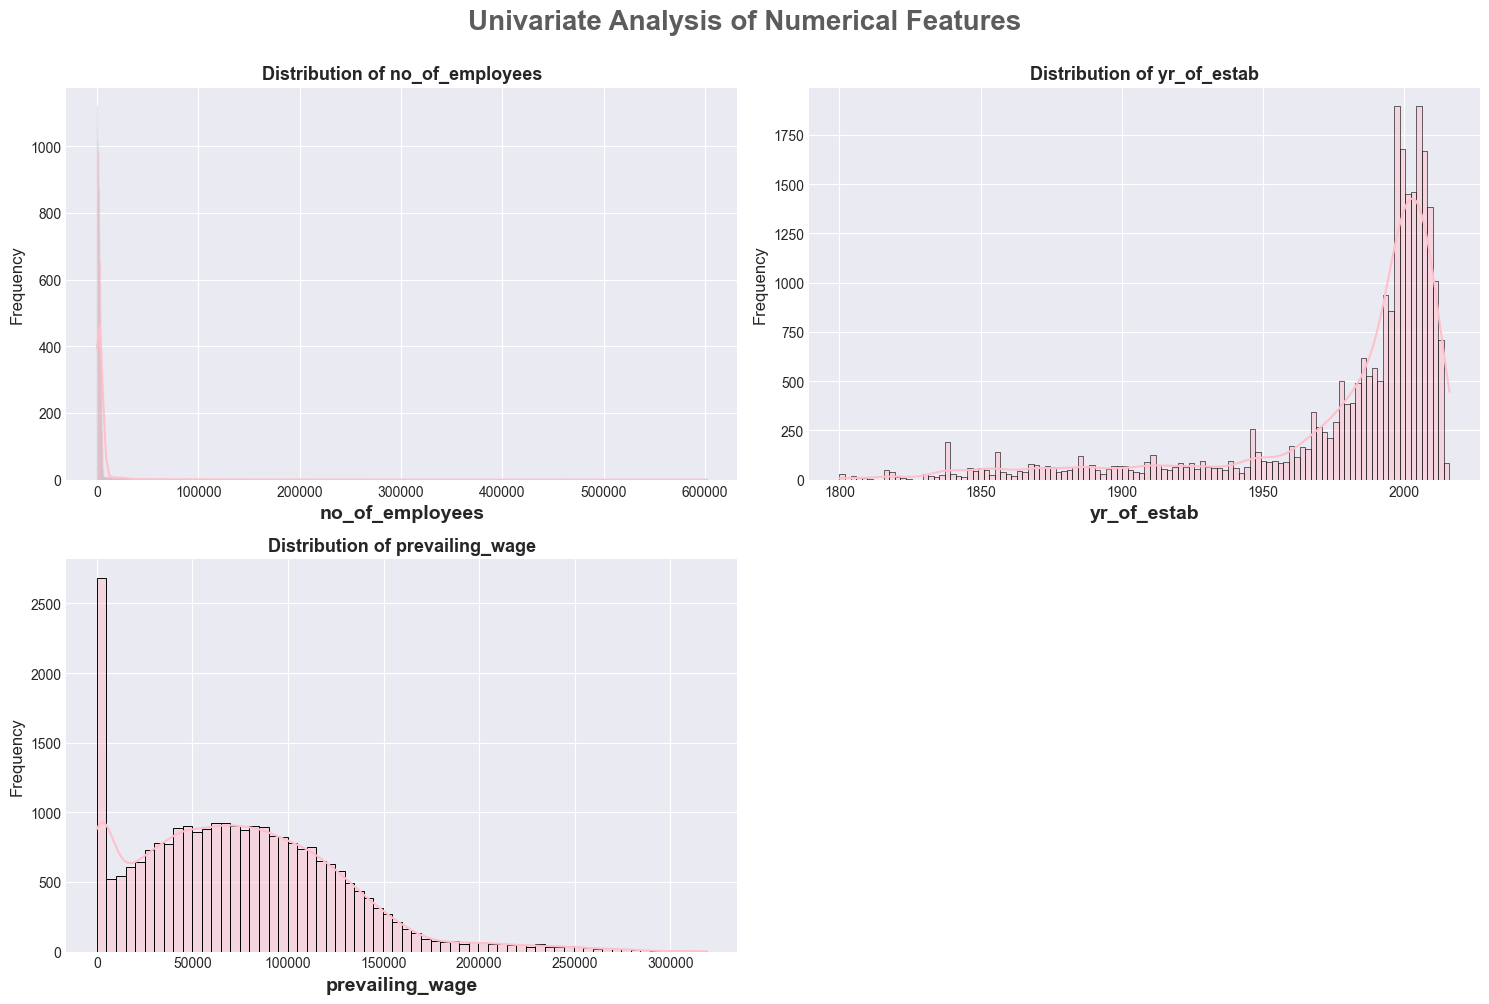

Figure saved at: plots\univariate_analysis.png


In [40]:
fig = plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.75, y=1.)

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=df[feature], color="pink", kde=True, edgecolor="black")
    plt.xlabel(feature, fontdict={"fontsize": 14, "fontweight": "bold"})
    plt.ylabel("Frequency", fontdict={"fontsize": 12})
    plt.title(f"Distribution of {feature}", fontsize=13, fontweight="bold")
    plt.tight_layout() 
    
plt.show()
save_fig(fig, "univariate_analysis")